In [61]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pandas as pd

In [62]:
housing = fetch_california_housing()
X_train_full, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(housing.data, housing.target, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

c:\Users\travi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5245109352606162

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X_iris_full, X_iris_test, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)
X_iris_train, X_iris_valid, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter = 10_000,random_state=42)
pipeline_clf = make_pipeline(StandardScaler(), mlp_clf)
pipeline_clf.fit(X_iris_train, y_iris_train)
y_pred = pipeline_clf.predict(X_iris_test)
accuracy_score(y_iris_test, y_pred)

1.0

In [64]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [65]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0 # Scaling from 0-255 to 0-1

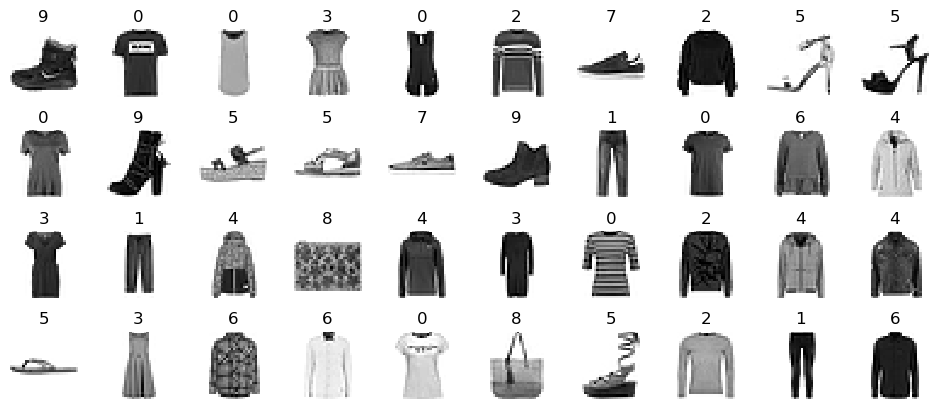

In [66]:
n_rows = 4 
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [67]:
class_names = ["T-shirt/top", "Pants", "Pullover", "Dress", "Jacket", "Sandal", "Shirt", "Sneaker","Bag", "Boot"]

In [68]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


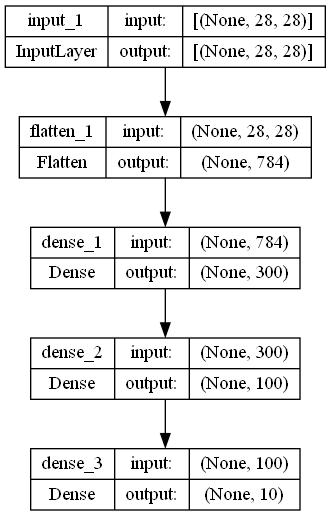

In [70]:
tf.keras.utils.plot_model(model)
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [71]:
model.layers

In [72]:
output_layer = model.get_layer('dense_2')
weights, biases = output_layer.get_weights()
weights

array([[-0.0161569 ,  0.0433655 ,  0.00760408, ...,  0.02756127,
        -0.10136368,  0.00860009],
       [-0.11800607, -0.09397729, -0.08730589, ...,  0.07400628,
        -0.08072037,  0.08959124],
       [ 0.07462662,  0.09876197,  0.04650315, ..., -0.10283677,
         0.06932545, -0.11884154],
       ...,
       [-0.08708905,  0.11059404,  0.10291427, ..., -0.0506939 ,
         0.1062421 ,  0.07436813],
       [-0.09093597, -0.01176616, -0.0857346 , ..., -0.11857045,
        -0.03254332, -0.11233857],
       [ 0.00132864, -0.05555888,  0.09760801, ..., -0.09949741,
         0.01168481, -0.09569183]], dtype=float32)

In [73]:
print(weights.shape)
print(biases.shape)

(300, 100)
(100,)


In [74]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [75]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=["accuracy"])

In [76]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7206 - accuracy: 0.7631 - val_loss: 0.5027 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4840 - accuracy: 0.8321 - val_loss: 0.4608 - val_accuracy: 0.8330
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4389 - accuracy: 0.8463 - val_loss: 0.4196 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4147 - accuracy: 0.8555 - val_loss: 0.3939 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3942 - accuracy: 0.8626 - val_loss: 0.3932 - val_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3779 - accuracy: 0.8667 - val_loss: 0.3925 - val_accuracy: 0.8626
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3653 - accuracy: 0.8704 - val_loss: 0.3692 - val_accuracy:

In [77]:
print(history.params)
print(history.epoch)
pd.DataFrame(history.history).head(2)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


,loss,accuracy,val_loss,val_accuracy
0,0.720604,0.763055,0.502702,0.8316
1,0.484043,0.832055,0.460815,0.8330


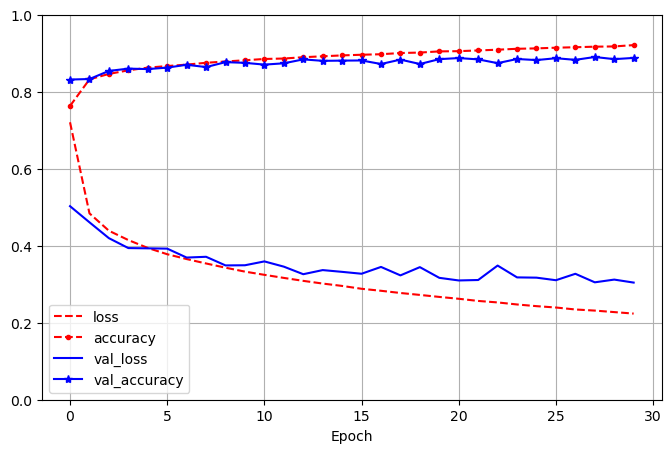

In [78]:
pd.DataFrame(history.history).plot(figsize=(8, 5), ylim=[0,1], grid=True, xlabel="Epoch", style=['r--', 'r--.', 'b-','b-*'])
plt.show()

In [79]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8847


[0.3189590275287628, 0.8847000002861023]

In [80]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 46ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

prediction:  ['Boot', 'Pullover', 'Pants']


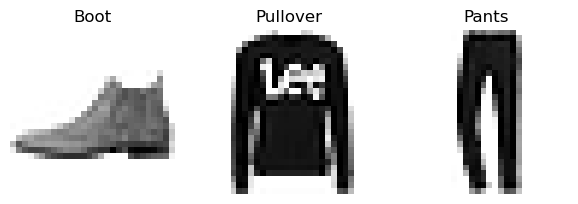

In [81]:
plt.figure(figsize=(7.2, 2.4))
y_pred = y_proba.argmax(axis=-1)
print("prediction: ", [class_names[y] for y in y_pred])
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [82]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 8.7068 - root_mean_squared_error: 2.9508 - val_loss: 8.4340 - val_root_mean_squared_error: 2.9043
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.3054 - root_mean_squared_error: 2.8819 - val_loss: 8.3972 - val_root_mean_squared_error: 2.8980
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2890 - root_mean_squared_error: 2.8791 - val_loss: 8.4124 - val_root_mean_squared_error: 2.9006
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2829 - root_mean_squared_error: 2.8780 - val_loss: 8.4556 - val_root_mean_squared_error: 2.9079
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2763 - root_mean_squared_error: 2.8769 - val_loss: 8.3960 - val_root_mean_squared_error: 2.8978
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2660 - root_mean_squared_error: 2.8751 - val_loss: 8

In [83]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [84]:
normalizating_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalizating_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [85]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["RootMeanSquaredError"])
normalizating_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/30
363/363 [==============================] - 1s 786us/step - loss: 1.6988 - root_mean_squared_error: 1.3034 - val_loss: 6.8017 - val_root_mean_squared_error: 2.6080
Epoch 2/30
363/363 [==============================] - 0s 589us/step - loss: 0.5070 - root_mean_squared_error: 0.7120 - val_loss: 3.5358 - val_root_mean_squared_error: 1.8804
Epoch 3/30
363/363 [==============================] - 0s 594us/step - loss: 0.4290 - root_mean_squared_error: 0.6550 - val_loss: 1.4430 - val_root_mean_squared_error: 1.2013
Epoch 4/30
363/363 [==============================] - 0s 592us/step - loss: 0.3882 - root_mean_squared_error: 0.6231 - val_loss: 0.5501 - val_root_mean_squared_error: 0.7417
Epoch 5/30
363/363 [==============================] - 0s 596us/step - loss: 0.3744 - root_mean_squared_error: 0.6118 - val_loss: 0.3796 - val_root_mean_squared_error: 0.6161
Epoch 6/30
363/363 [==============================] - 0s 594us/step - loss: 0.3600 - root_mean_squared_error: 0.6000 - val_loss: 0

array([[0.49218416],
       [1.2634751 ],
       [4.6280866 ]], dtype=float32)

In [86]:
#input layer
input_wide =tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
#normalization layer
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
#rest of the deep layers for input_deep
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#Output layer w/ concat on wide and deep layer
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [87]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [88]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_train_wide[:3], X_train_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))
print(f'mse_test: {mse_test}')
y_pred

Epoch 1/20
363/363 [==============================] - 1s 828us/step - loss: 2.4001 - root_mean_squared_error: 1.5492 - val_loss: 2.3584 - val_root_mean_squared_error: 1.5357
Epoch 2/20
363/363 [==============================] - 0s 657us/step - loss: 0.6369 - root_mean_squared_error: 0.7980 - val_loss: 0.7564 - val_root_mean_squared_error: 0.8697
Epoch 3/20
363/363 [==============================] - 0s 638us/step - loss: 0.4942 - root_mean_squared_error: 0.7030 - val_loss: 0.4388 - val_root_mean_squared_error: 0.6624
Epoch 4/20
363/363 [==============================] - 0s 634us/step - loss: 0.4361 - root_mean_squared_error: 0.6604 - val_loss: 0.5511 - val_root_mean_squared_error: 0.7423
Epoch 5/20
363/363 [==============================] - 0s 630us/step - loss: 0.4056 - root_mean_squared_error: 0.6369 - val_loss: 0.3818 - val_root_mean_squared_error: 0.6179
Epoch 6/20
363/363 [==============================] - 0s 633us/step - loss: 0.3862 - root_mean_squared_error: 0.6215 - val_loss: 0

array([[3.186516 ],
       [1.9761947],
       [2.3970582]], dtype=float32)

In [89]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()

norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#Using multiple outputs in 1 layer
output = tf.keras.layers.Dense(1)(concat)
output_aux = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, output_aux])

In [90]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9,0.1), optimizer=optimizer, metrics=['RootMeanSquaredError'])

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(f'weight sum of losses: {weighted_sum_of_losses}\nmain_loss: {main_loss}, aux_loss: {aux_loss}\nmain_rmse: {main_rmse}, aux_rmse:{aux_rmse}')        

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.6312 - dense_2_loss: 1.4451 - dense_3_loss: 3.3054 - dense_2_root_mean_squared_error: 1.2021 - dense_3_root_mean_squared_error: 1.8181 - val_loss: 2.6774 - val_dense_2_loss: 1.0477 - val_dense_3_loss: 17.3449 - val_dense_2_root_mean_squared_error: 1.0236 - val_dense_3_root_mean_squared_error: 4.1647
Epoch 2/20
363/363 [==============================] - 0s 732us/step - loss: 0.5453 - dense_2_loss: 0.4805 - dense_3_loss: 1.1286 - dense_2_root_mean_squared_error: 0.6932 - dense_3_root_mean_squared_error: 1.0623 - val_loss: 2.6681 - val_dense_2_loss: 2.4039 - val_dense_3_loss: 5.0463 - val_dense_2_root_mean_squared_error: 1.5505 - val_dense_3_root_mean_squared_error: 2.2464
Epoch 3/20
363/363 [==============================] - 0s 736us/step - loss: 0.4752 - dense_2_loss: 0.4452 - dense_3_loss: 0.7451 - dense_2_root_mean_squared_error: 0.6672 - dense_3_root_mean_squared_error: 0.8632 - val_loss: 0.8696 - val_dense_2

In [91]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(f'main guesses: {[x[0] for x in y_pred_main]}')
print(f'aux guesses: {[x_aux[0] for x_aux in y_pred_aux]}')
print(f'actual: {[y for y in y_train[:3]]}')

1/1 [==============================] - 0s 35ms/step
main guesses: [3.2106829, 1.889017, 2.169754]
aux guesses: [3.1777346, 1.9331378, 2.3649545]
actual: [1.442, 1.687, 1.621]


In [92]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 12ms/step


{'dense_2': array([[3.2106829],
        [1.889017 ],
        [2.169754 ]], dtype=float32),
 'dense_3': array([[3.1777346],
        [1.9331378],
        [2.3649545]], dtype=float32)}

In [93]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation='relu', name="Subclass_model") 

In [94]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Epoch 1/10
363/363 [==============================] - 1s 993us/step - loss: 1.8119 - output_1_loss: 1.7577 - output_2_loss: 2.2990 - output_1_root_mean_squared_error: 1.3258 - output_2_root_mean_squared_error: 1.5163 - val_loss: 0.8668 - val_output_1_loss: 0.6966 - val_output_2_loss: 2.3990 - val_output_1_root_mean_squared_error: 0.8346 - val_output_2_root_mean_squared_error: 1.5489
Epoch 2/10
363/363 [==============================] - 0s 730us/step - loss: 0.5931 - output_1_loss: 0.5795 - output_2_loss: 0.7153 - output_1_root_mean_squared_error: 0.7613 - output_2_root_mean_squared_error: 0.8457 - val_loss: 1.8512 - val_output_1_loss: 1.8857 - val_output_2_loss: 1.5403 - val_output_1_root_mean_squared_error: 1.3732 - val_output_2_root_mean_squared_error: 1.2411
Epoch 3/10
363/363 [==============================] - 0s 760us/step - loss: 0.5228 - output_1_loss: 0.5160 - output_2_loss: 0.5841 - output_1_root_mean_squared_error: 0.7183 - output_2_root_mean_squared_error: 0.7643 - val_loss:

In [95]:
print(f'weight sum of losses: {weighted_sum_of_losses}\nmain_loss: {main_loss}, aux_loss: {aux_loss}\nmain_rmse: {main_rmse}, aux_rmse:{aux_rmse}')  
print(f'main guesses: {[x[0] for x in y_pred_main]}')
print(f'aux guesses: {[x_aux[0] for x_aux in y_pred_aux]}')
print(f'actual: {[y for y in y_train[:3]]}')

weight sum of losses: 0.35962894558906555
main_loss: 0.35032445192337036, aux_loss: 0.44337016344070435
main_rmse: 0.5918821096420288, aux_rmse:0.6658604741096497
main guesses: [3.2682948, 2.0717113, 1.9544439]
aux guesses: [3.1060123, 2.050408, 2.0265813]
actual: [1.442, 1.687, 1.621]


In [96]:
model.save("First_Keras_model", save_format="tf")

INFO:tensorflow:Assets written to: First_Keras_model\assets


INFO:tensorflow:Assets written to: First_Keras_model\assets


In [97]:
model = tf.keras.models.load_model("First_Keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))  
print(f'main guesses: {[y[0] for y in y_pred_main]}')
print(f'aux guesses: {[y_aux[0] for y_aux in y_pred_aux]}')

1/1 [==============================] - 0s 35ms/step
main guesses: [3.2682953, 2.0717113, 1.9544439]
aux guesses: [3.1060123, 2.050408, 2.0265813]


In [98]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("My_checkpoint", save_weights_only=True)
histor = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3675 - output_1_loss: 0.3589 - output_2_loss: 0.4453 - output_1_root_mean_squared_error: 0.5990 - output_2_root_mean_squared_error: 0.6673 - val_loss: 0.3365 - val_output_1_loss: 0.3172 - val_output_2_loss: 0.5105 - val_output_1_root_mean_squared_error: 0.5632 - val_output_2_root_mean_squared_error: 0.7145
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3613 - output_1_loss: 0.3530 - output_2_loss: 0.4360 - output_1_root_mean_squared_error: 0.5941 - output_2_root_mean_squared_error: 0.6603 - val_loss: 0.6893 - val_output_1_loss: 0.6651 - val_output_2_loss: 0.9072 - val_output_1_root_mean_squared_error: 0.8156 - val_output_2_root_mean_squared_error: 0.9525
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3547 - output_1_loss: 0.3468 - output_2_loss: 0.4257 - output_1_root_mean_squared_error: 0.5889 - output_2_root_mean_squared_error: 0.6525 - val_loss: 0.337

In [99]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3308 - output_1_loss: 0.3246 - output_2_loss: 0.3872 - output_1_root_mean_squared_error: 0.5697 - output_2_root_mean_squared_error: 0.6222 - val_loss: 0.3118 - val_output_1_loss: 0.3048 - val_output_2_loss: 0.3756 - val_output_1_root_mean_squared_error: 0.5521 - val_output_2_root_mean_squared_error: 0.6128
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3337 - output_1_loss: 0.3276 - output_2_loss: 0.3892 - output_1_root_mean_squared_error: 0.5723 - output_2_root_mean_squared_error: 0.6238 - val_loss: 0.4248 - val_output_1_loss: 0.4202 - val_output_2_loss: 0.4659 - val_output_1_root_mean_squared_error: 0.6482 - val_output_2_root_mean_squared_error: 0.6825
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3302 - output_1_loss: 0.3243 - output_2_loss: 0.3831 - output_1_root_mean_squared_error: 0.5695 - output_2_root_mean_squared_error: 0.6190 - val_loss: 0.338

In [100]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"]/ logs["loss"]
        print(f"\nEpoch={epoch}, val/train={ratio:.2f}")

In [101]:
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[early_stopping_cb, PrintValTrainRatioCallback()])

Epoch 1/20
  1/363 [..............................] - ETA: 1s - loss: 0.3800 - output_1_loss: 0.3932 - output_2_loss: 0.2610 - output_1_root_mean_squared_error: 0.6271 - output_2_root_mean_squared_error: 0.5108WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0004s vs `on_train_batch_end` time: 0.0005s). Check your callbacks.


335/363 [==========================>...] - ETA: 0s - loss: 0.3286 - output_1_loss: 0.3222 - output_2_loss: 0.3862 - output_1_root_mean_squared_error: 0.5676 - output_2_root_mean_squared_error: 0.6214
Epoch=0, val/train=1.80
363/363 [==============================] - 0s 834us/step - loss: 0.3305 - output_1_loss: 0.3242 - output_2_loss: 0.3875 - output_1_root_mean_squared_error: 0.5694 - output_2_root_mean_squared_error: 0.6225 - val_loss: 0.5943 - val_output_1_loss: 0.5939 - val_output_2_loss: 0.5979 - val_output_1_root_mean_squared_error: 0.7707 - val_output_2_root_mean_squared_error: 0.7733
Epoch 2/20
323/363 [=========================>....] - ETA: 0s - loss: 0.3349 - output_1_loss: 0.3290 - output_2_loss: 0.3888 - output_1_root_mean_squared_error: 0.5735 - output_2_root_mean_squared_error: 0.6235
Epoch=1, val/train=0.97
363/363 [==============================] - 0s 815us/step - loss: 0.3355 - output_1_loss: 0.3295 - output_2_loss: 0.3900 - output_1_root_mean_squared_error: 0.5740 - o

In [102]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [103]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [104]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100,200))
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
          callbacks=tensorboard_cb)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.7497 - root_mean_squared_error: 1.3227 - val_loss: 1.2535 - val_root_mean_squared_error: 1.1196
Epoch 2/20
363/363 [==============================] - 0s 793us/step - loss: 0.7743 - root_mean_squared_error: 0.8799 - val_loss: 0.9737 - val_root_mean_squared_error: 0.9867
Epoch 3/20
363/363 [==============================] - 0s 799us/step - loss: 0.6581 - root_mean_squared_error: 0.8112 - val_loss: 0.8514 - val_root_mean_squared_error: 0.9227
Epoch 4/20
363/363 [==============================] - 0s 818us/step - loss: 0.5979 - root_mean_squared_error: 0.7732 - val_loss: 0.6248 - val_root_mean_squared_error: 0.7904
Epoch 5/20
363/363 [==============================] - 0s 799us/step - loss: 0.5578 - root_mean_squared_error: 0.7469 - val_loss: 0.5527 - val_root_mean_squared_error: 0.7434
Epoch 6/20
363/363 [==============================] - 0s 825us/step - loss: 0.5245 - root_mean_squared_error: 0.7242 - val_loss: 0.5

In [105]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        
        data = (np.random.randn(100) + 2) * step/100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step/1000
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
        


In [106]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [107]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=0, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2)
    
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [108]:
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5, overwrite=True,
                                      directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data= (X_valid, y_valid))

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.8392000198364258

Best val_accuracy So Far: 0.8392000198364258
Total elapsed time: 00h 00m 50s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [109]:
top3_model = random_search_tuner.get_best_models(num_models=3)
best_model = top3_model[0]

In [110]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 0,
 'n_neurons': 70,
 'learning_rate': 0.0031472868718643962,
 'optimizer': 'sgd'}

In [112]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 0
n_neurons: 70
learning_rate: 0.0031472868718643962
optimizer: sgd
Score: 0.8392000198364258


In [113]:
best_trial.metrics.get_last_value("val_accuracy")

0.8392000198364258

In [114]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 1s 476us/step - loss: 498.3716 - accuracy: 0.7836
Epoch 2/10
1875/1875 [==============================] - 1s 475us/step - loss: 476.8976 - accuracy: 0.7901
Epoch 3/10
1875/1875 [==============================] - 1s 484us/step - loss: 469.2399 - accuracy: 0.7922
Epoch 4/10
1875/1875 [==============================] - 1s 477us/step - loss: 449.3876 - accuracy: 0.7961
Epoch 5/10
1875/1875 [==============================] - 1s 481us/step - loss: 472.3846 - accuracy: 0.7943
Epoch 6/10
1875/1875 [==============================] - 1s 487us/step - loss: 455.4780 - accuracy: 0.7971
Epoch 7/10
1875/1875 [==============================] - 1s 469us/step - loss: 457.0459 - accuracy: 0.7965
Epoch 8/10
1875/1875 [==============================] - 1s 473us/step - loss: 468.7754 - accuracy: 0.7973
Epoch 9/10
1875/1875 [==============================] - 1s 460us/step - loss: 445.4979 - accuracy: 0.8009
Epoch 10/10
313/313 [=========================

In [115]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("nomalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [116]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband"
)

In [117]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 04s]
val_accuracy: 0.7932000160217285

Best val_accuracy So Far: 0.8496000170707703
Total elapsed time: 00h 03m 41s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [118]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt"
)
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data= (X_valid, y_valid),
                          callbacks=[early_stopping_cb, tensorboard_cb])

Trial 10 Complete [00h 00m 14s]
val_accuracy: 0.824999988079071

Best val_accuracy So Far: 0.8398000001907349
Total elapsed time: 00h 01m 11s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit
